In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_mu(clusters):
    s = 0
    for cluster in clusters:
        s += cluster.shape[0]
    return [1/s]*s

def dist(point1, point2):
    if point1.shape[0] == 2:
        return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2
    if point1.shape[0] == 3:
        return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 + (point1[2] - point2[2])**2
    
def generate_d_graph_1(points, adj):
    n = points.shape[0]
    max_dist = 10.0
    d = np.zeros((n, n)) + max_dist
    for src in range(n):
        not_visited = np.array([True] * n)
        shortest_path = np.array([max_dist] * n)
        shortest_path[src] = 0
        while not_visited.sum() > 0:
#             print(shortest_path)
#             print(not_visited)
            current_min = np.argmin((shortest_path - max_dist)*(not_visited))
            if shortest_path[current_min] >= max_dist:
                break
            if not_visited[current_min] == False:
                break
            for neigh in adj[current_min]:
                dis = math.sqrt(dist(points[current_min], points[neigh]))
#                 print(current_min, neigh, dis)
                if shortest_path[current_min] + dis < shortest_path[neigh]:
                    shortest_path[neigh] = shortest_path[current_min] + dis
            not_visited[current_min] = False
        for i in range(n):
            d[src, i] = shortest_path[i]
    return d

def generate_d_graph(clusters, adjs):
    s = 0
    for cluster in clusters:
        s += cluster.shape[0]
    n = s
    ix = np.zeros((n,n))
    d = np.zeros((n,n))
        
    s = 0
    for k in range(len(clusters)):
        dc = generate_d_graph_1(clusters[k], adjs[k])
        for i in range(clusters[k].shape[0]):
            for j in range(clusters[k].shape[0]):
                ix[i+s, j+s] = 1
                d[i+s, j+s] = dc[i, j]**2
        s += clusters[k].shape[0]
    return d, ix
            
                
    

def generate_d(clusters):
    s = 0
    for cluster in clusters:
        s += cluster.shape[0]
    n = s
    ix = np.zeros((n,n))
    d = np.zeros((n,n))
        
    s = 0
    for cluster in clusters:
        for i in range(cluster.shape[0]):
            for j in range(cluster.shape[0]):
                ix[i+s, j+s] = 1
                d[i+s, j+s] = dist(cluster[i], cluster[j])
        s += cluster.shape[0]
    return d, ix

In [4]:
def gamma(mu, d_x, i_x, d_y):
#     print(mu.shape)
#     print(d_x.shape)
#     print(i_x.shape)
#     print(d_y.shape)
    return np.matmul(np.matmul(i_x, mu), d_y*d_y) - 2*np.matmul(np.matmul(d_x, mu), d_y)

In [5]:
def cost(gamma, mu):
    if mu.shape[0] != gamma.shape[0]:
        print(mu.shape)
        print(gamme.shape)
    s = 0
    for i in range(mu.shape[0]):
        for j in range(mu.shape[1]):
            s += mu[i,j] * gamma[i,j]
    return s

In [6]:
def my_sinkhorn(a, b, K, numItermax=5000, stopThr=1e-3):

    # init data
    dim_a = len(a)
    dim_b = len(b)
    u = np.ones(dim_a) / dim_a
    v = np.ones(dim_b) / dim_b

    tmp2 = np.empty(b.shape, dtype=K.dtype)
    
    Kp = (1 / a).reshape(-1, 1) * K
    cpt = 0
    err = 1
    while (err > stopThr and cpt < numItermax):

        KtransposeU = np.dot(K.T, u)
        v = np.divide(b, KtransposeU)
        u = 1. / np.dot(Kp, v)

        if (np.any(KtransposeU == 0)
                or np.any(np.isnan(u)) or np.any(np.isnan(v))
                or np.any(np.isinf(u)) or np.any(np.isinf(v))):
            # we have reached the machine precision
            # come back to previous solution and quit loop
            print('Warning: numerical errors at iteration', cpt)
        if cpt % 10 == 0:
            # we can speed up the process by checking for the error only all
            # the 10th iterations
            # compute right marginal tmp2= (diag(u)Kdiag(v))^T1
            np.einsum('i,ij,j->j', u, K, v, out=tmp2)
            err = np.linalg.norm(tmp2 - b)  # violation of marginal
        cpt = cpt + 1
        
    return u.reshape((-1, 1)) * K * v.reshape((1, -1))

In [7]:
import ot

In [8]:
import matplotlib.image as mpimg

In [9]:
img=mpimg.imread('Data/puzz/abc/abc-s.png')

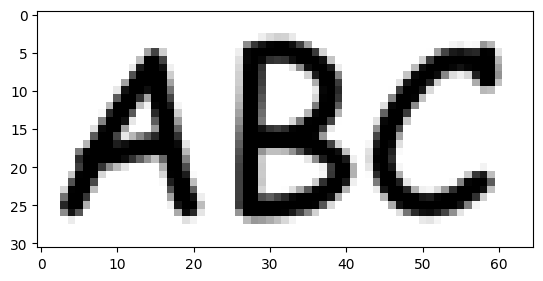

In [10]:
plt.imshow(img)

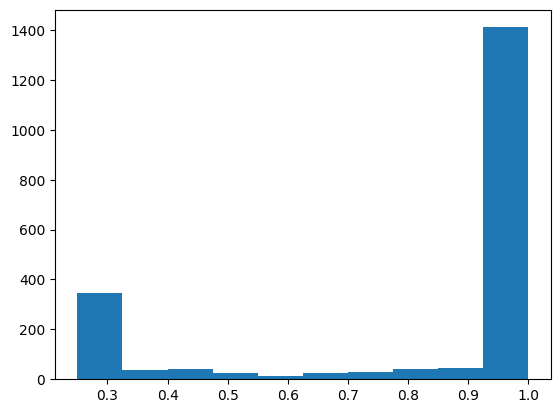

In [11]:
vals = img.mean(axis=2).flatten()
plt.hist(vals)
plt.show()

In [12]:
img[img > 0.8] = 1

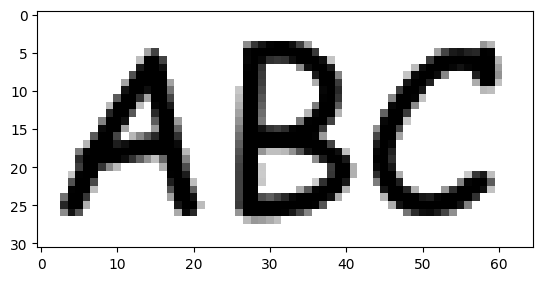

In [13]:
plt.imshow(img)

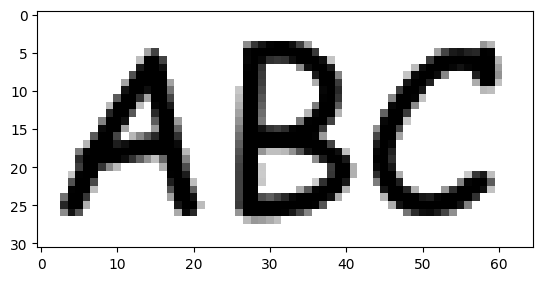

In [14]:
plt.imshow(img)
n1 = img.shape[0]
n2 = img.shape[1]

In [15]:
mu_y = []
points_y = []
labels = []
for j in range(n1):
    for k in range(n2):
        if img[j,k,0] < 1:
#             mu_y.append(1 - img[j,k,0])
            mu_y.append(1)
            points_y.append([j,k])
            if k < 22:
                labels.append(1)
            elif k < 42:
                labels.append(2)
            else:
                labels.append(3)
points_y = np.array(points_y)

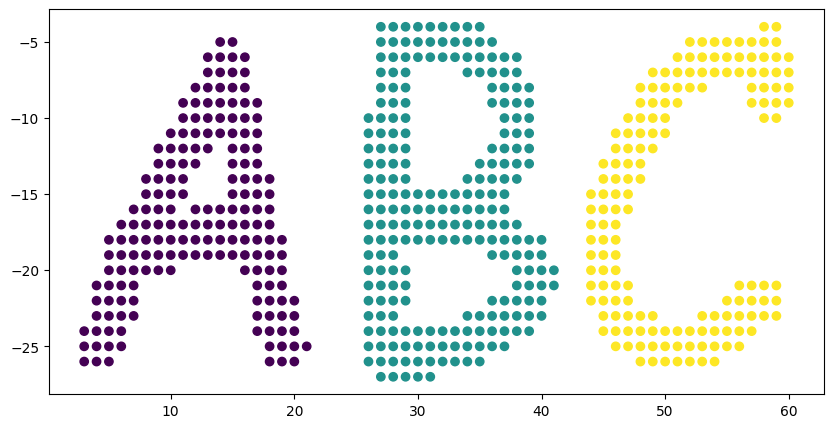

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.scatter(points_y[:,1], -points_y[:,0], c=labels)
plt.show()

In [17]:
(np.array(labels)==3).sum()

153

In [18]:
points_y.shape

(559, 2)

In [19]:
s = 0
for i in range(len(mu_y)):
    if labels[i] == 2:
        s += mu_y[i]
print(s)

229


In [20]:
file_path_extensions = ['a', 'b', 'c']
file_path_origin = 'Data/puzz/abc/%s-s.png'
volumes = np.array([(np.array(labels)==1).sum(), (np.array(labels)==2).sum(), (np.array(labels)==3).sum()])

Data/puzz/abc/a-s.png
(144, 2)


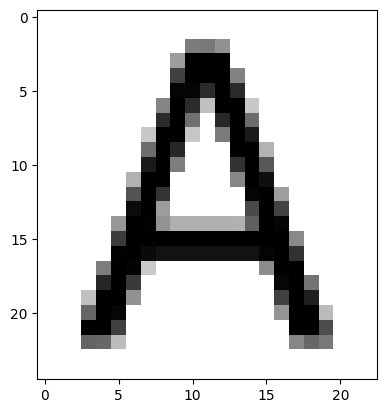

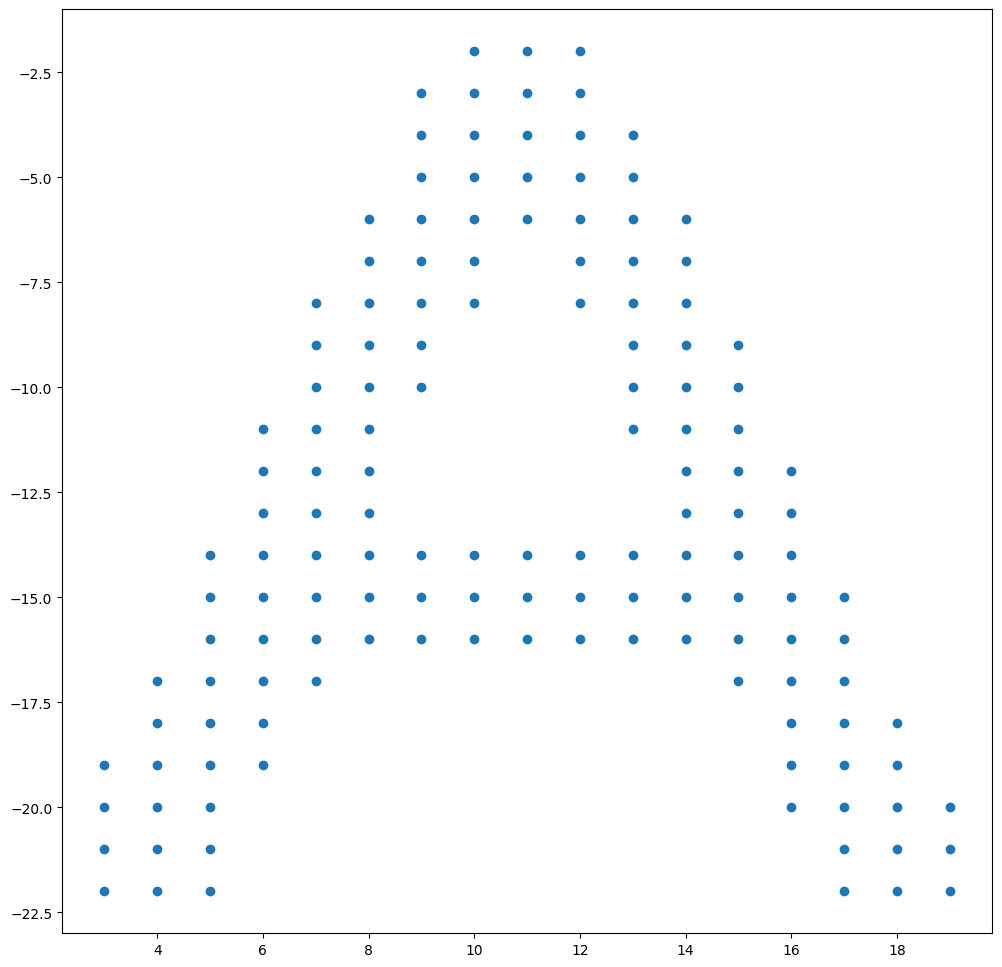

Data/puzz/abc/b-s.png
(198, 2)


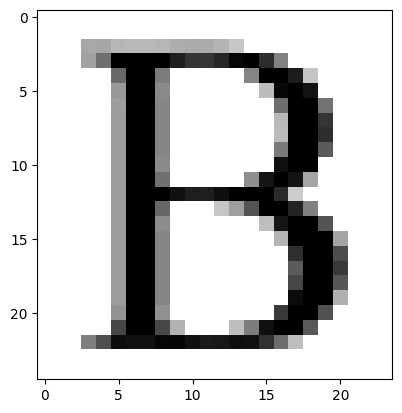

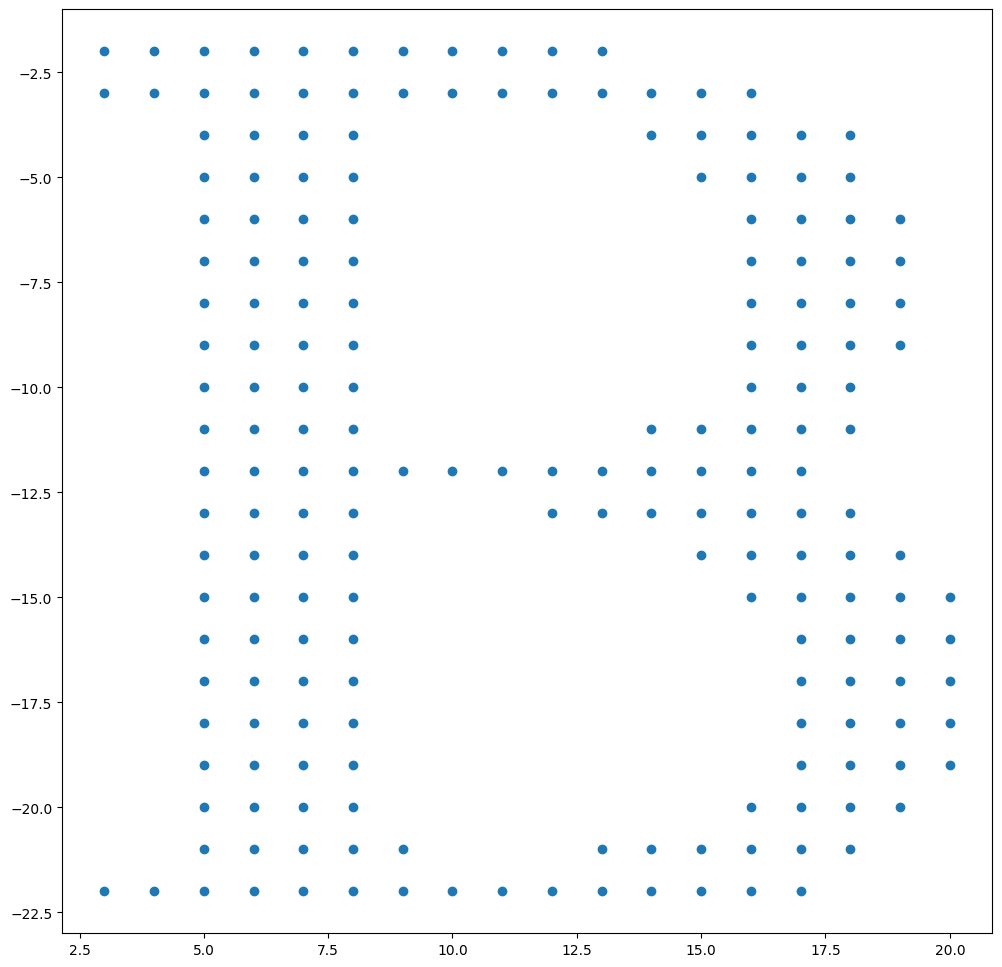

Data/puzz/abc/c-s.png
(110, 2)


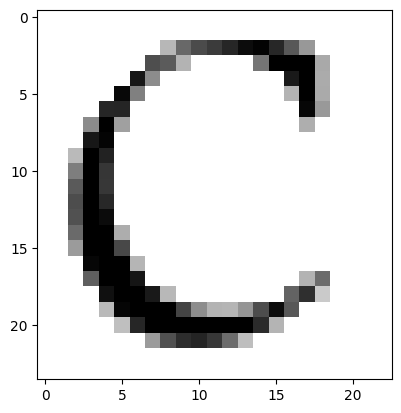

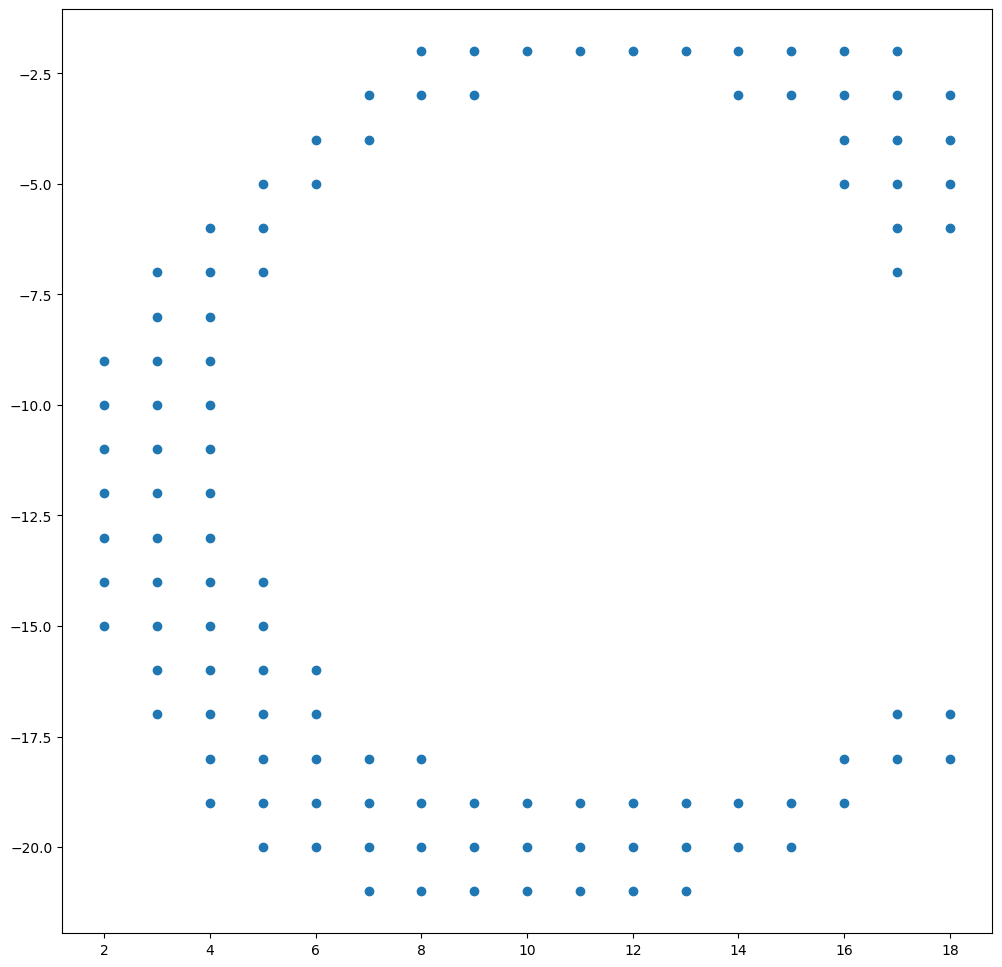

In [21]:
points_x = []
index = []
mu_x = []
for i in range(len(file_path_extensions)):
    file_path = file_path_origin%(file_path_extensions[i],)
    img=mpimg.imread(file_path)
    img[img > 0.8] = 1
    plt.imshow(img)
    print(file_path)
    points_x.append([])
    
    num = 0
    n1 = img.shape[0]
    n2 = img.shape[1]
    
    for j in range(n1):
        for k in range(n2):
            if img[j,k,0] < 1:
                num += 1
                points_x[-1].append([j,k])
    points_x[-1] = np.array(points_x[-1])
    mu_x += [volumes[i]/num] * num
    
    print(points_x[-1].shape)
    for j in range(points_x[-1].shape[0]):
        index.append(i)
    
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot()
    ax.scatter(points_x[-1][:,1], -points_x[-1][:,0])
    plt.show()

In [22]:
1 - (6/(110 + 198 + 144))

0.9867256637168141

In [133]:
# img=mpimg.imread('Data/puzz/ubc/b-s.png')

In [134]:
# plt.imshow(img)

In [135]:
# img[img > 0.8] = 1

In [136]:
# plt.imshow(img)

In [138]:

# n1 = img.shape[0]
# n2 = img.shape[1]

# mu_x = []
# points_x1 = []
# for j in range(n1):
#     for k in range(n2):
#         if img[j,k,0] < 1:
#             mu_x.append(1 - img[j,k,0])
#             points_x1.append([j,k])
# points_x1 = np.array(points_x1)

In [139]:
# points_x1.shape

In [23]:
points_y.shape

(559, 2)

In [24]:
mu_x = np.array(mu_x)
mu_y = np.array(mu_y, dtype=np.float64)

In [25]:
mu_x.shape

(452,)

In [26]:
mu_x.sum()

559.0000000000001

In [27]:
mu_y.sum()

559.0

In [28]:
mu_x /= mu_x.sum()
mu_y /= mu_y.sum()

In [29]:
mu_x.shape

(452,)

In [30]:
mu_x.sum()

0.9999999999999999

In [31]:
d_y, i_y = generate_d([points_y])
d_x, i_x = generate_d(points_x)

#####
0
22
1.433805658038207
1.0


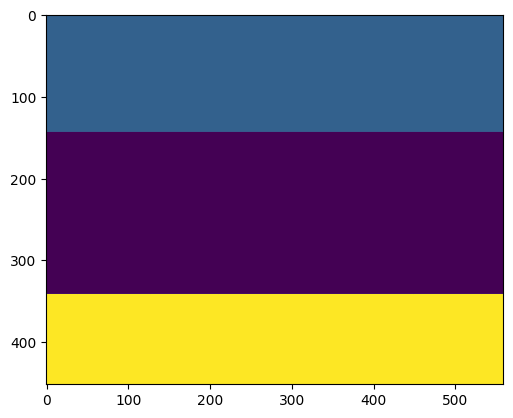

0.49457216262817383
#####
1
22
1.798667571682294
0.9999999999999998


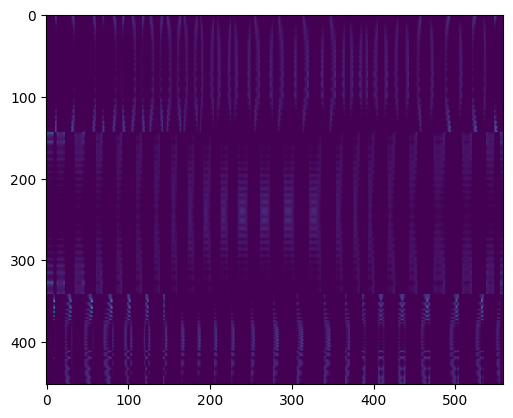

0.47521018981933594
#####
2
22
1.8701036051716977
0.9999999999999997


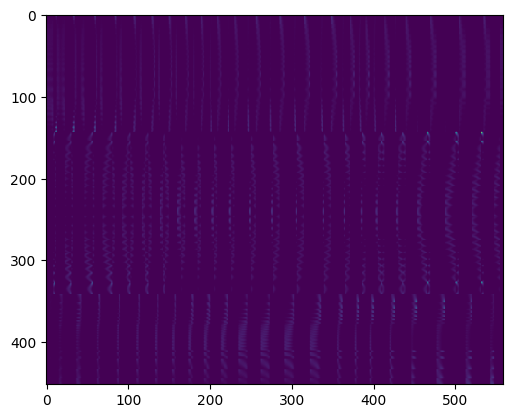

0.7007200717926025
#####
3
22
0.6884545708170994
0.9999999999999998


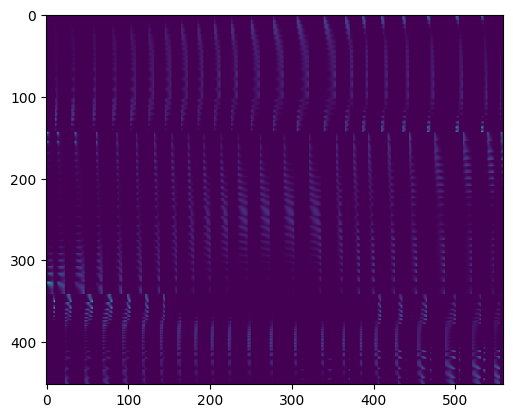

0.4691767692565918
#####
4
22
0.31834557022856946
0.9999999999999997


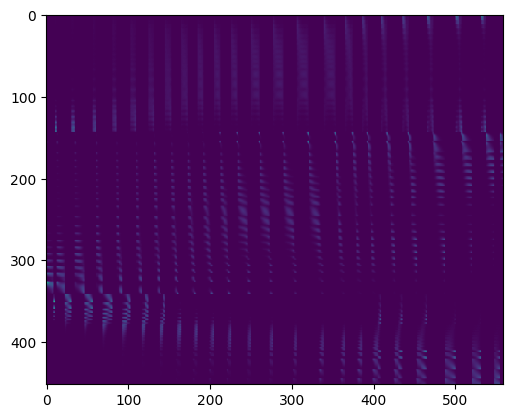

0.547419548034668
#####
5
22
0.18867662373605446
1.0


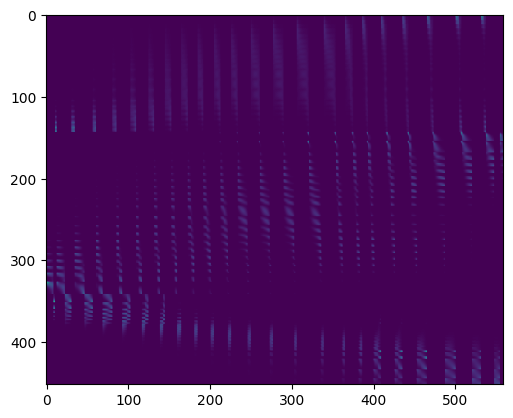

0.5456864833831787
#####
6
22
0.11840921046408244
1.0


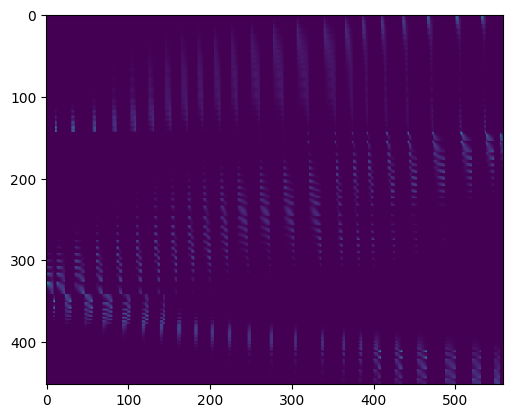

0.5252077579498291
#####
7
22
0.08089984261163215
1.0


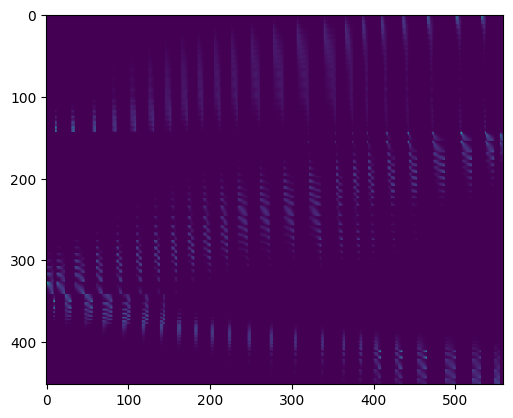

0.615595817565918
#####
8
22
0.05387804782609733
0.9999999999999997


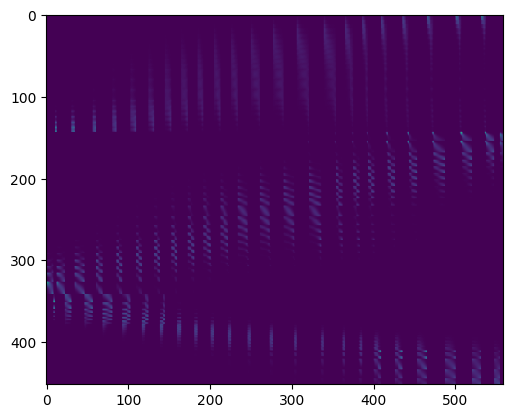

0.5870707035064697
#####
9
22
0.032849620920345386
0.9999999999999999


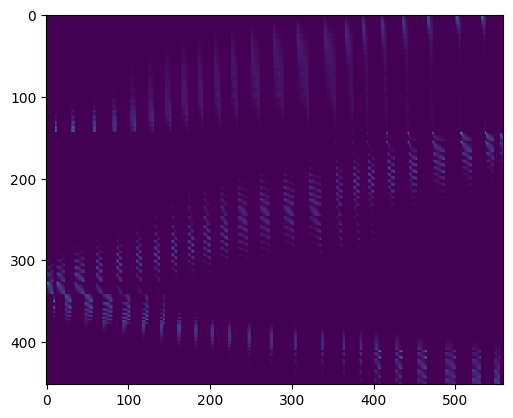

0.47661828994750977
#####
10
22
0.021248765104548657
1.0


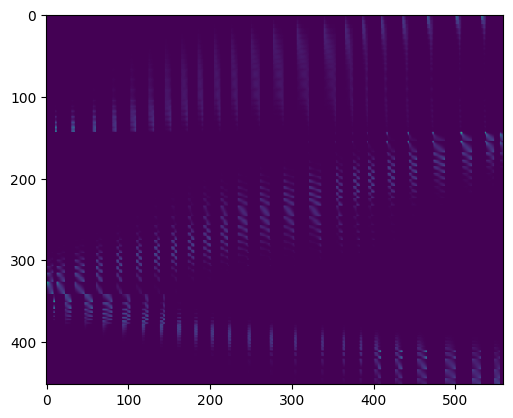

0.5388212203979492
#####
11
22
0.013897785170528601
1.0


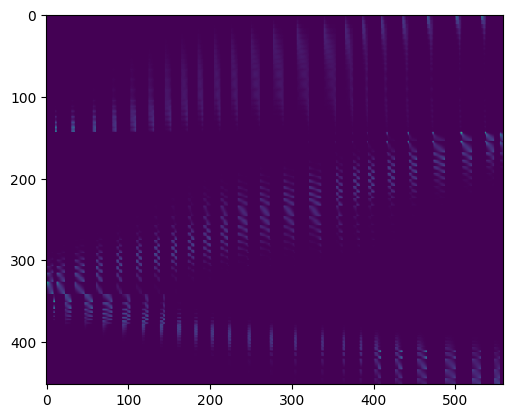

0.5108785629272461
#####
12
22
0.01326674700550621
1.0


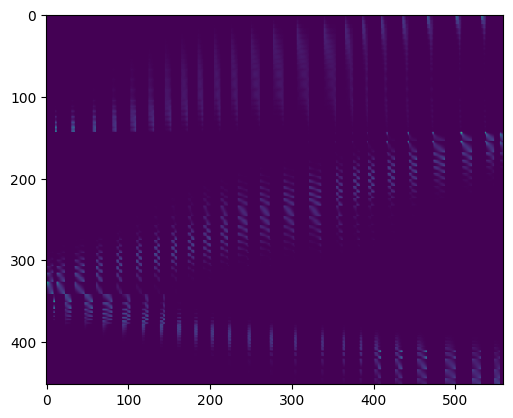

0.7000095844268799
#####
13
22
0.003977098993853636
1.0


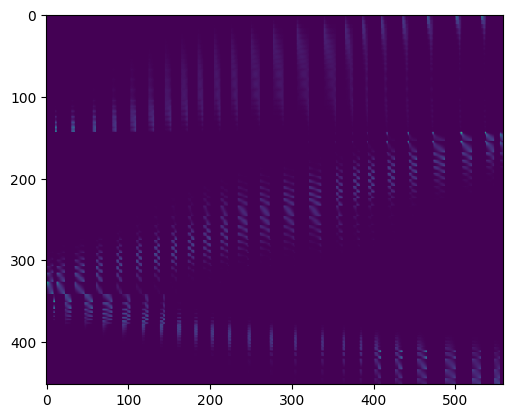

0.6101939678192139
#####
14
22
0.001944920052491203
0.9999999999999999


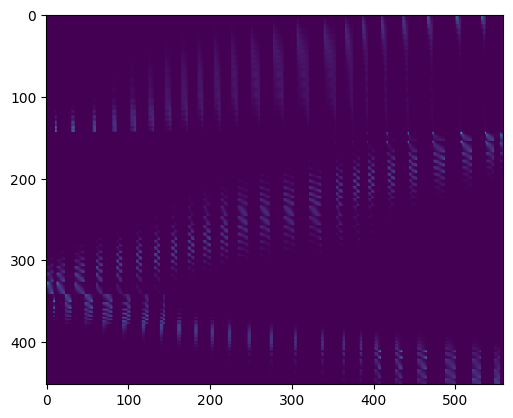

0.579646110534668
#####
15
22
0.0012639613141477077
0.9999999999999998


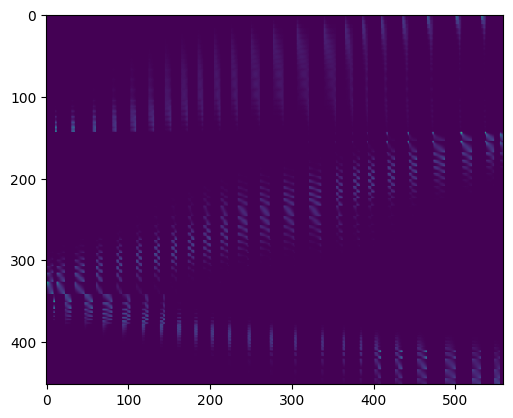

0.49471092224121094
#####
16
22
0.0008660917870263337
0.9999999999999999


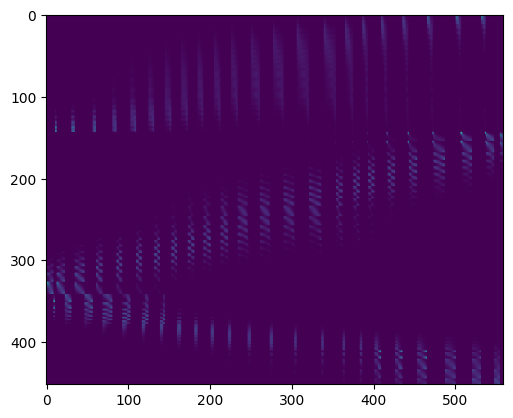

0.45532774925231934
#####
17
22
0.0006013222841284157
0.9999999999999998


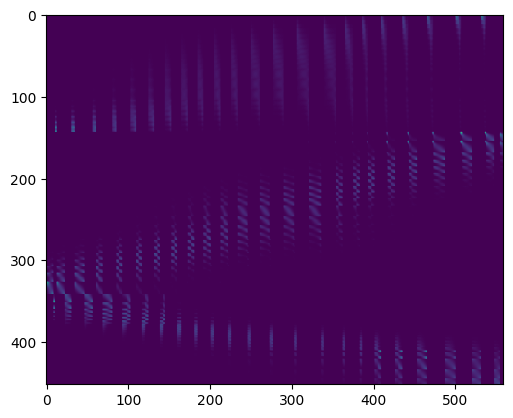

0.4476652145385742
#####
18
22
0.00041973003380611713
0.9999999999999999


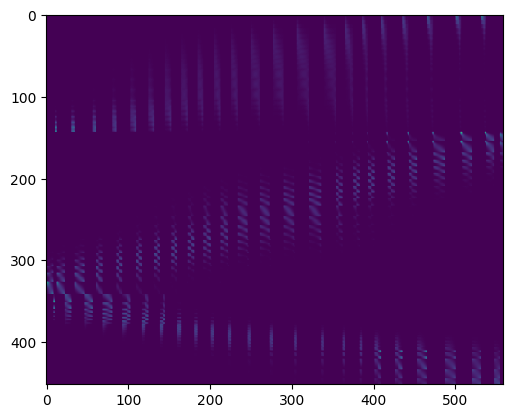

0.4649693965911865
#####
19
22
0.00029406213767552326
0.9999999999999999


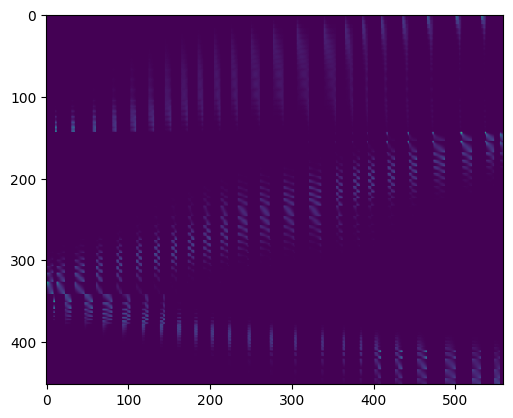

0.3872971534729004
#####
20
22
0.00020668384506705023
0.9999999999999998


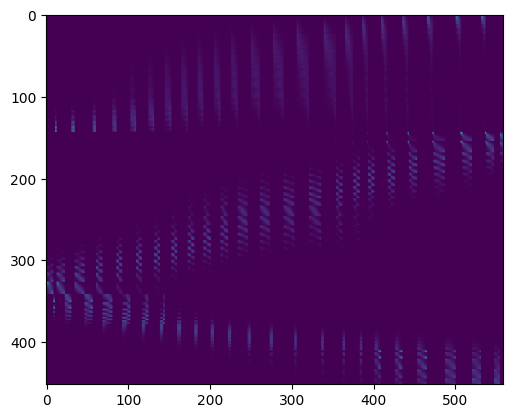

0.4693326950073242
#####
21
22
0.0001457254690516874
0.9999999999999996


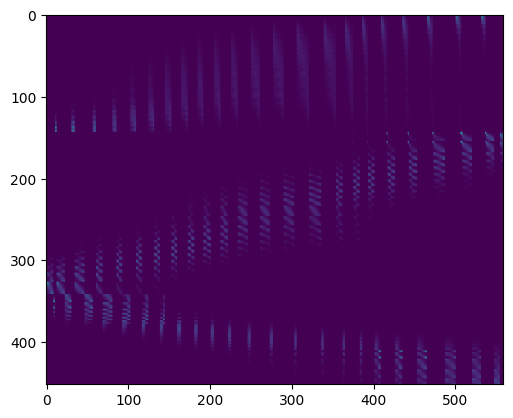

0.5093355178833008
#####
22
22
0.0001030756127441468
0.9999999999999999


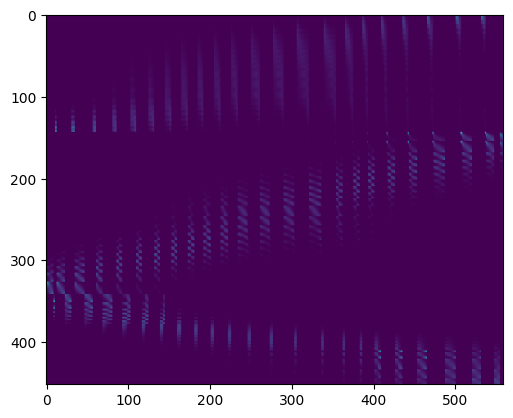

0.49101996421813965
#####
23
22
7.314652386237361e-05
0.9999999999999997


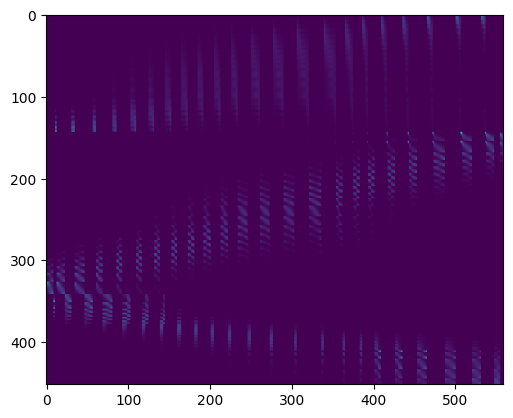

0.5169610977172852
#####
24
22
5.20795007762193e-05
0.9999999999999999


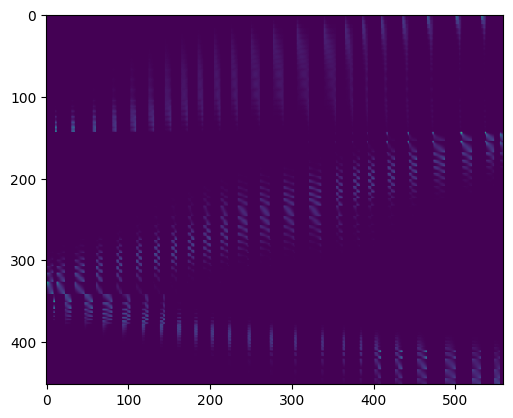

0.45291876792907715
#####
25
22
3.7203672884840454e-05
0.9999999999999997


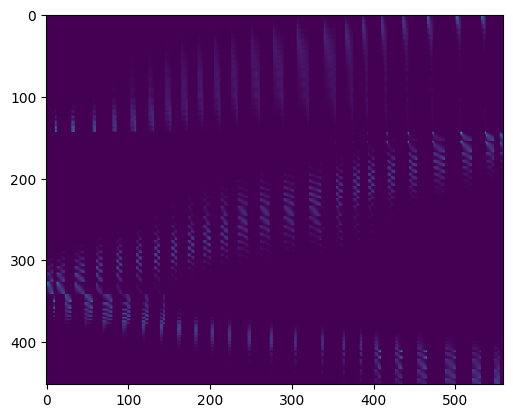

0.4448273181915283
#####
26
22
2.6664558828485677e-05
0.9999999999999998


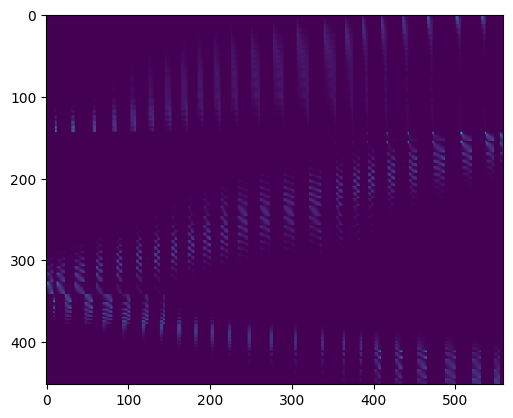

0.49400901794433594
#####
27
22
1.9171824268556066e-05
0.9999999999999998


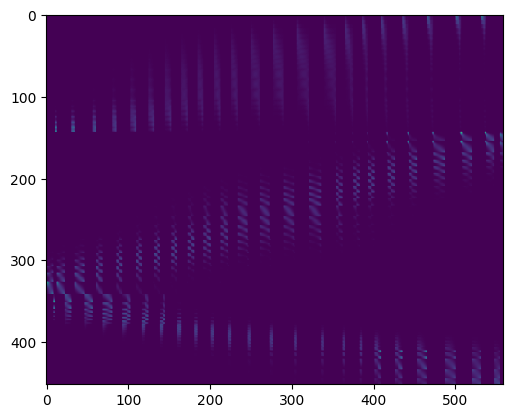

0.49326157569885254
#####
28
22
1.3827957022789655e-05
0.9999999999999996


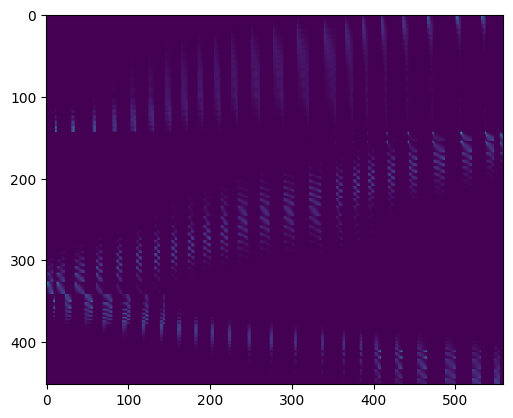

0.5032320022583008
#####
29
22
1.000424369673857e-05
1.0


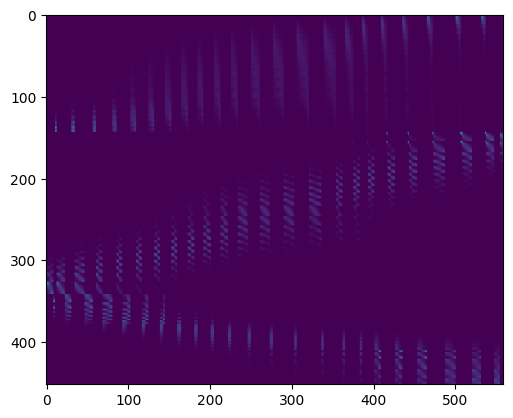

0.7091336250305176
#####
30
22
7.259622829215078e-06
0.9999999999999999


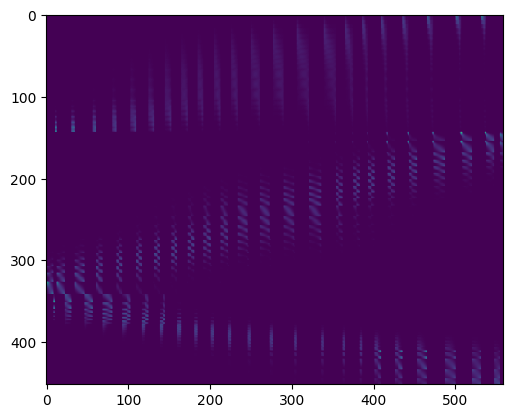

0.5321478843688965
#####
31
22
5.283338022229607e-06
0.9999999999999997


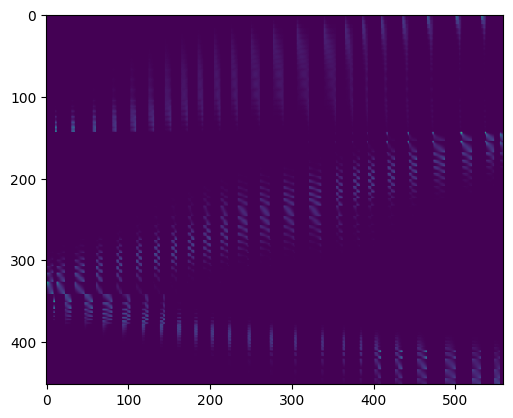

0.7081384658813477
#####
32
22
3.855892243201268e-06
0.9999999999999998


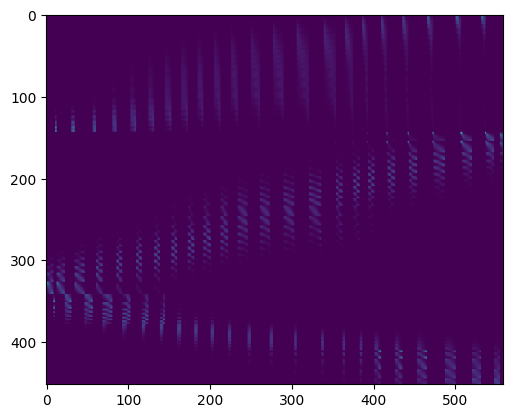

0.5989758968353271
#####
33
22
2.8217656906956636e-06
0.9999999999999997


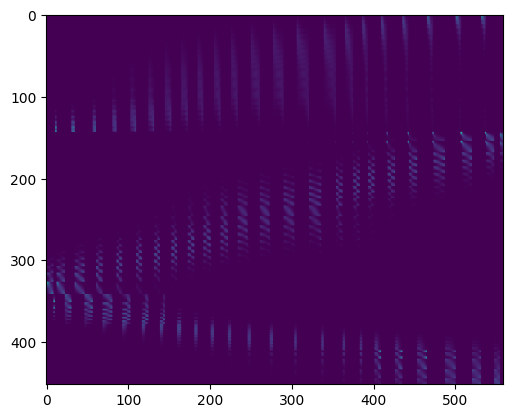

0.600740909576416
#####
34
22
2.070379891218176e-06
0.9999999999999997


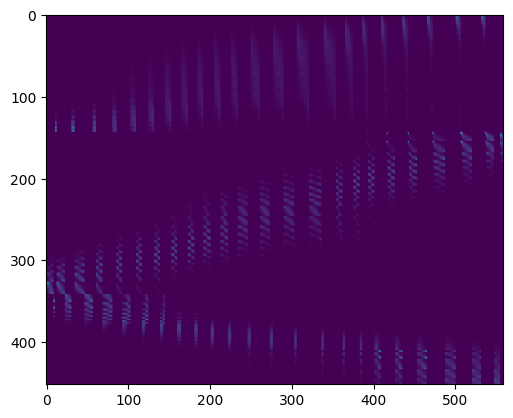

0.5039536952972412
#####
35
22
1.522904865984012e-06
0.9999999999999998


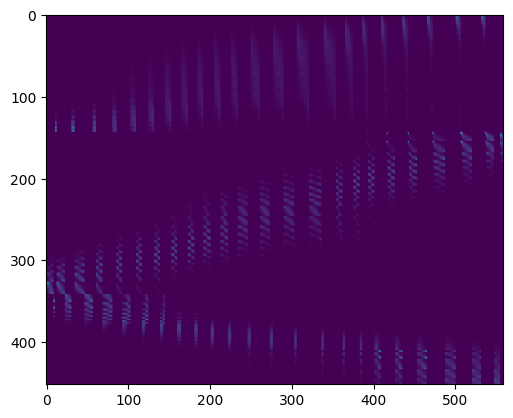

0.5768694877624512
#####
36
22
1.1228613809340863e-06
0.9999999999999998


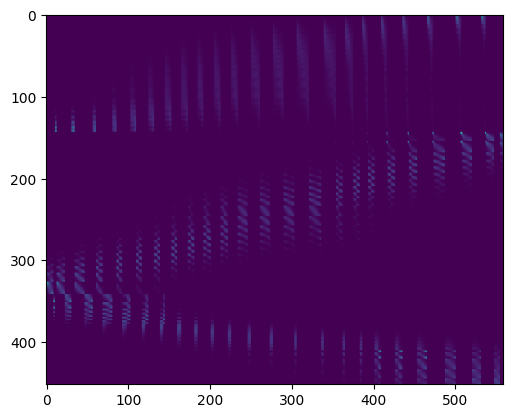

0.49195051193237305
#####
37
22
8.297569874067235e-07
0.9999999999999999


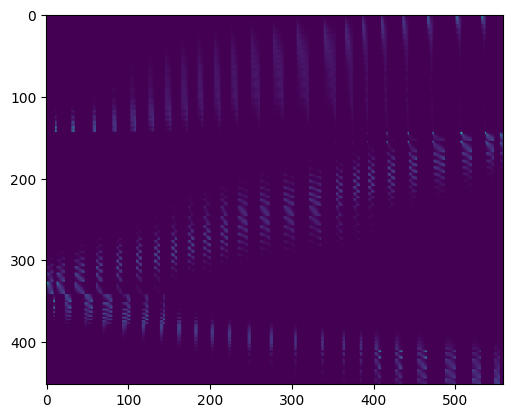

0.4772024154663086
#####
38
22
6.144510819197797e-07
0.9999999999999999


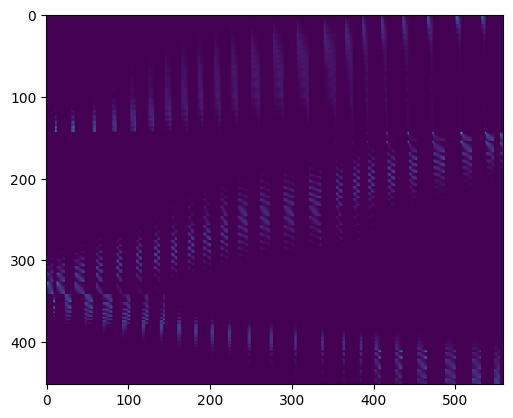

0.4830484390258789
#####
39
22
4.5591062073769903e-07
0.9999999999999999


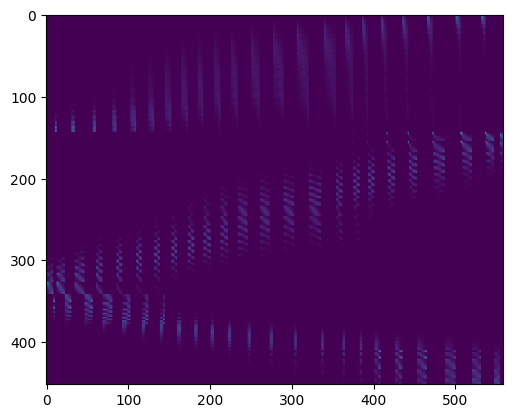

0.503746509552002


In [32]:
eta = 1
import time
alpha = 1e3
cur_mu = np.outer(mu_x, mu_y)
dif = []
costs = []
mus = []
for i in range(40):
    t = time.time()
    c = gamma(cur_mu, d_x, i_x, d_y)
    c_o = c
#     c -= c.min()
#     c = (c**eta) * (cur_mu**(1-eta))
    
#     plt.imshow(c)
#     plt.show()
#     print(c)
    
    
#     k = 1/c.sum() *c.shape[0] * c.shape[1]
#     c = c*k
#     alpha1=alpha*k
    # Next 3 lines equivalent to K= np.exp(-c/alpha), but faster to compute
    K = np.empty(c.shape, dtype=c.dtype)
    np.divide(c, -alpha, out=K)
    np.exp(K, out=K)
    Kc = (K**eta) * (cur_mu**(1-eta))
    mu = my_sinkhorn(mu_x, mu_y, Kc)
#     mu = ot.sinkhorn(mu_x, mu_y, c, alpha1)
    print('#####')
    print(i)
    print(k)
    print(abs(mu - cur_mu).sum())
    print(mu.sum())
    dif.append(abs(mu - cur_mu).sum())
    costs.append(cost(c_o, cur_mu))
    plt.imshow(cur_mu)
    plt.show()
#     plt.imshow(c)
    plt.show()
    cur_mu = mu
#     if dif[-1] < 1e-1:
#         cur_mu = np.random.rand(mu.shape[0], mu.shape[1])
#         cur_mu /= cur_mu.sum()
    mus.append(cur_mu)
    print(time.time() - t)

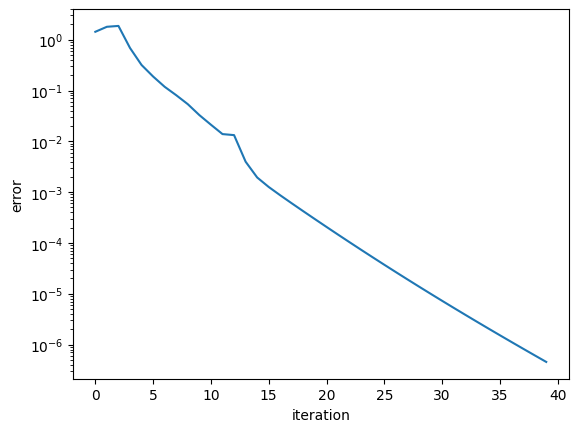

In [33]:
plt.plot(dif)
plt.yscale('log')
plt.ylabel('error')
plt.xlabel('iteration')
plt.show()

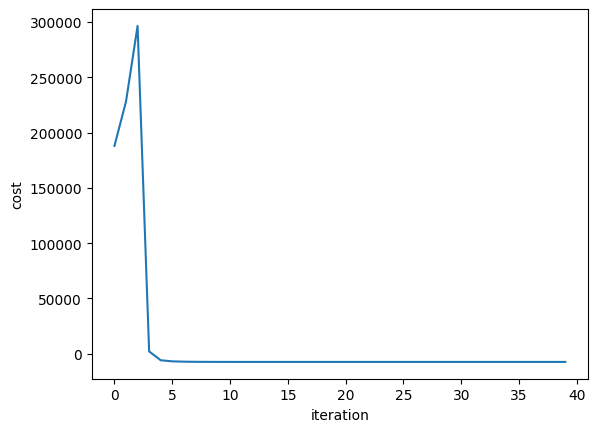

In [34]:
plt.plot(costs)
# plt.yscale('log')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

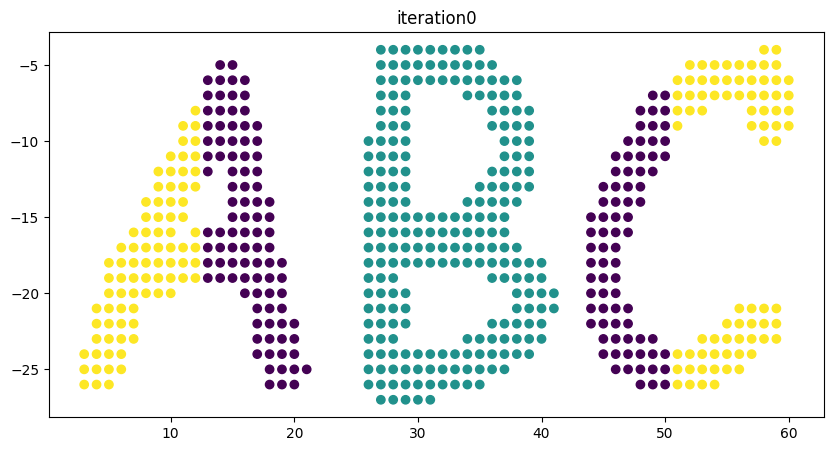

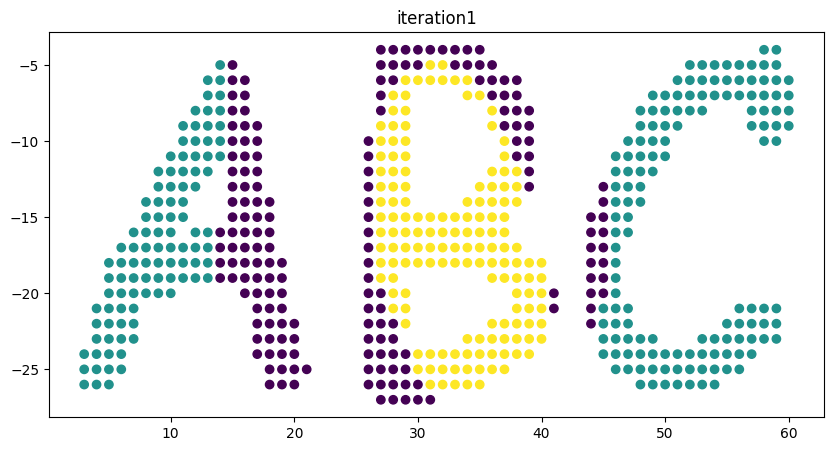

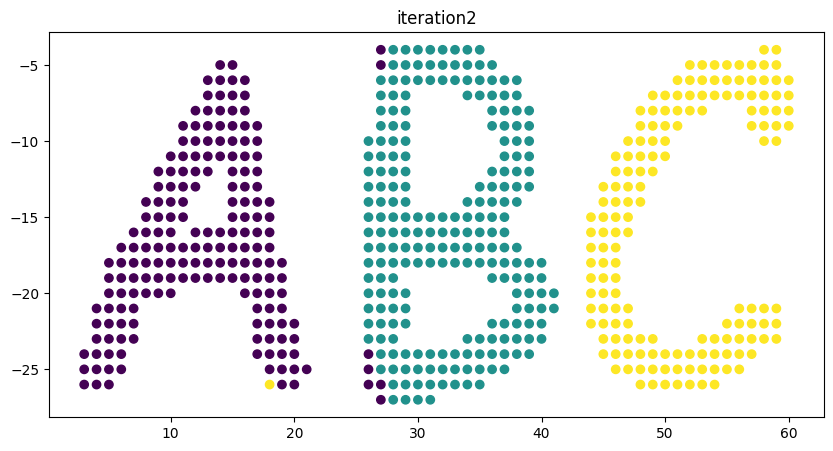

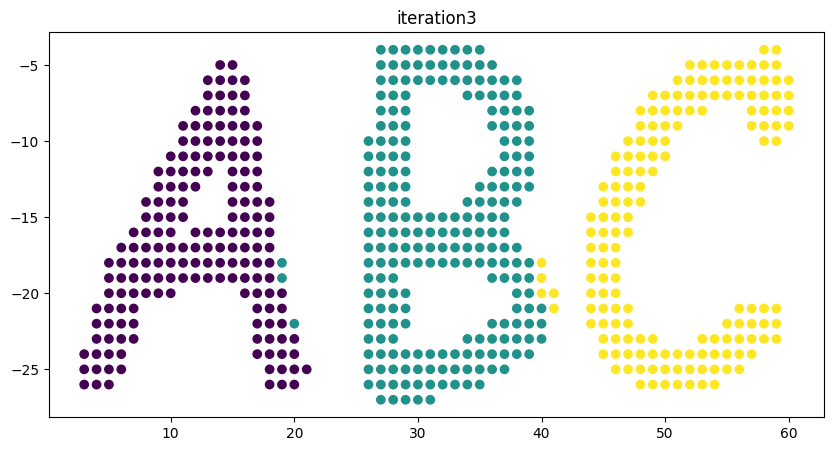

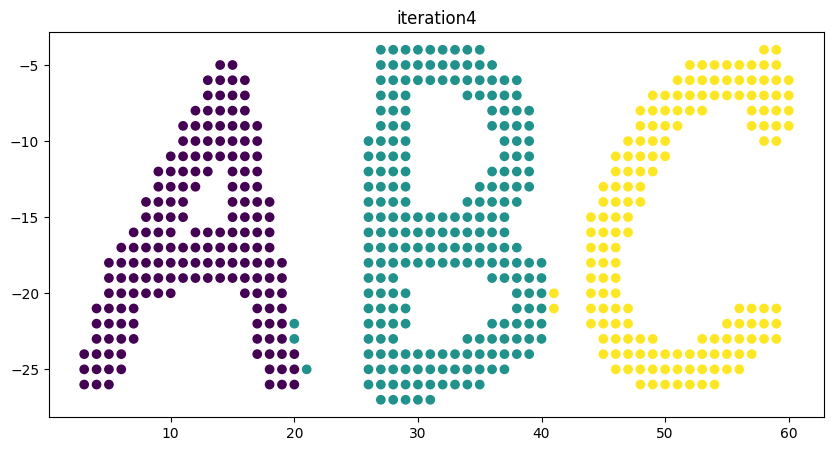

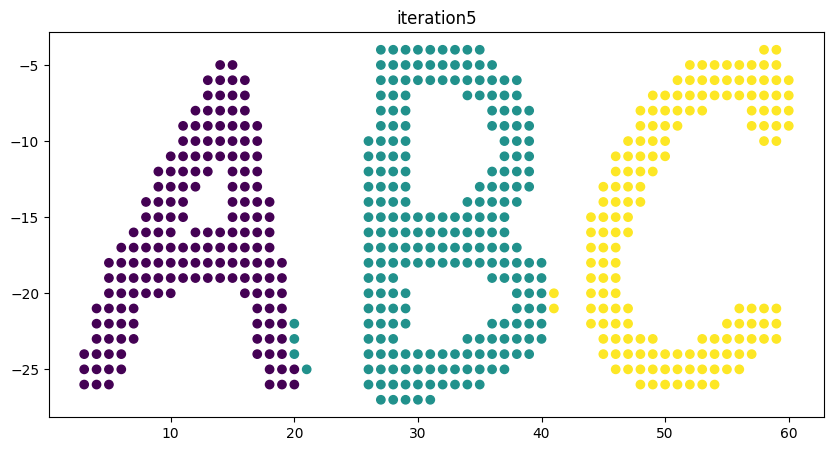

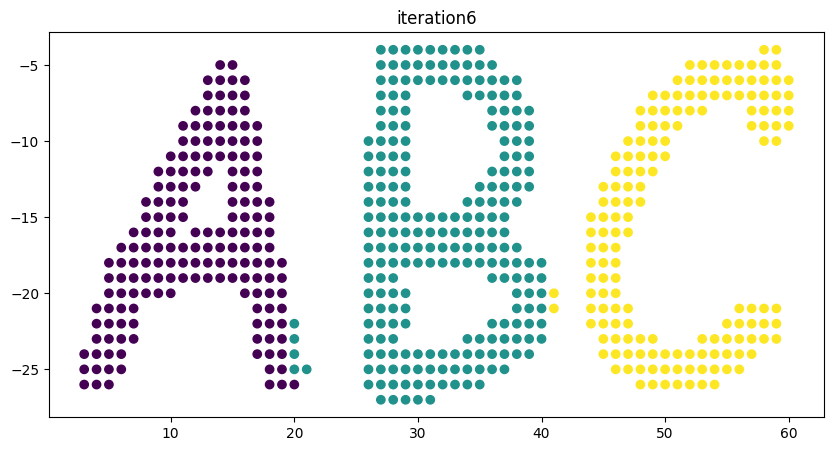

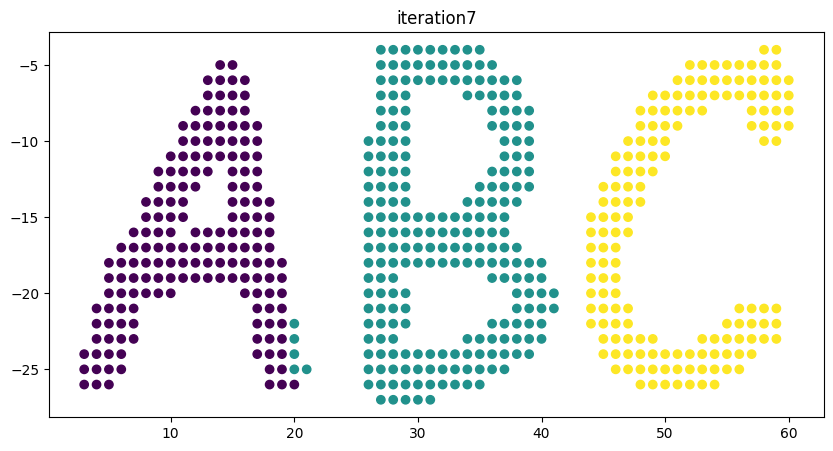

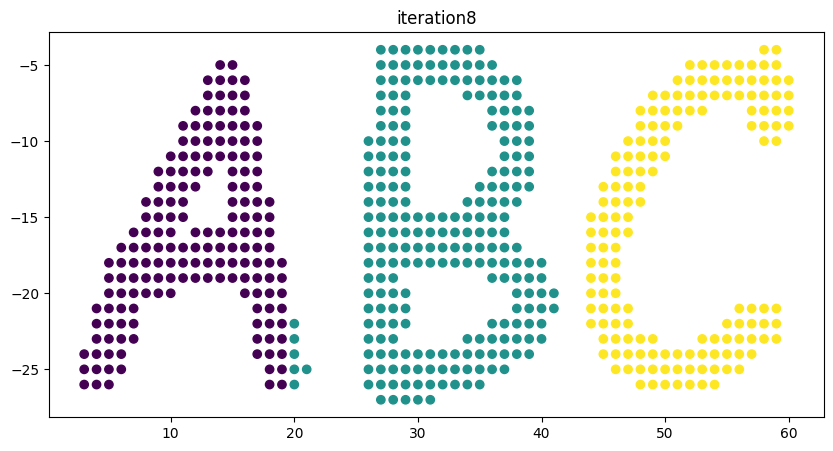

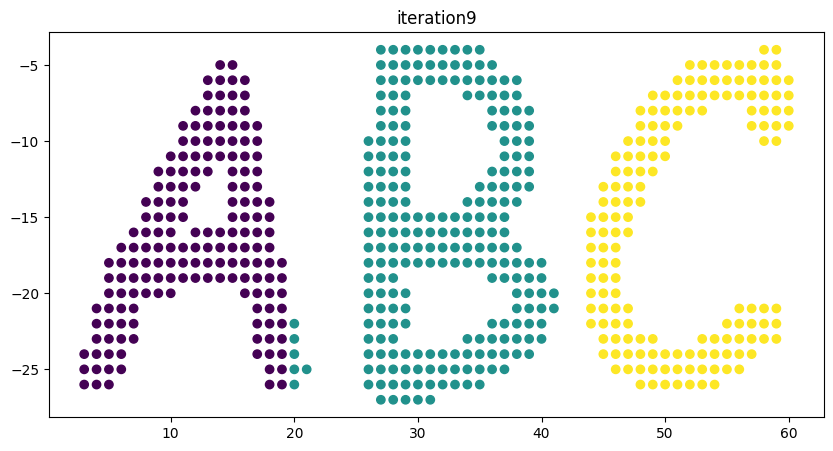

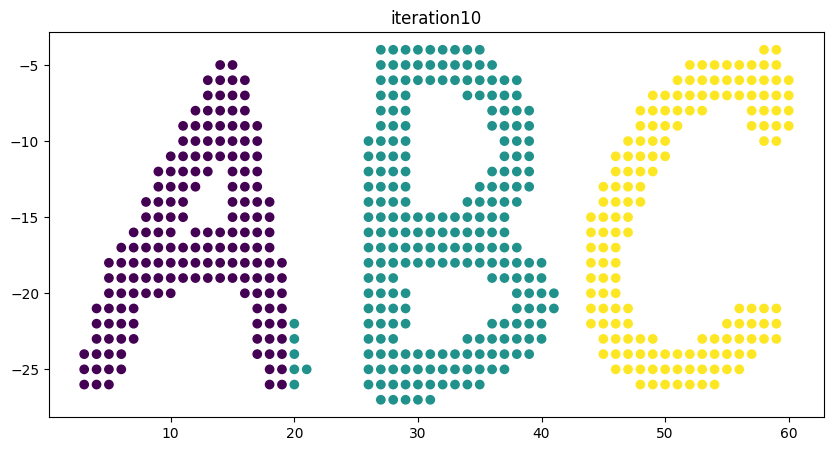

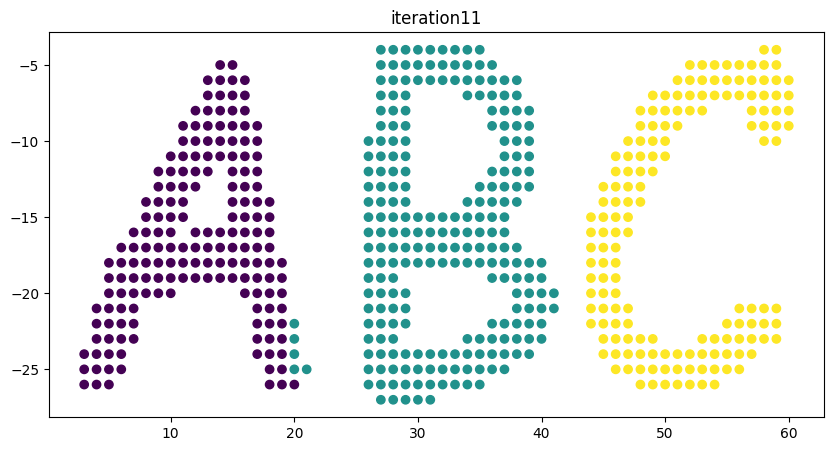

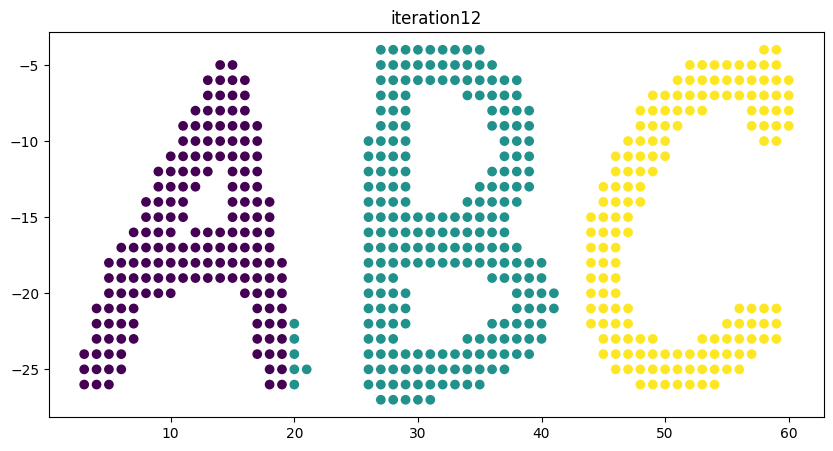

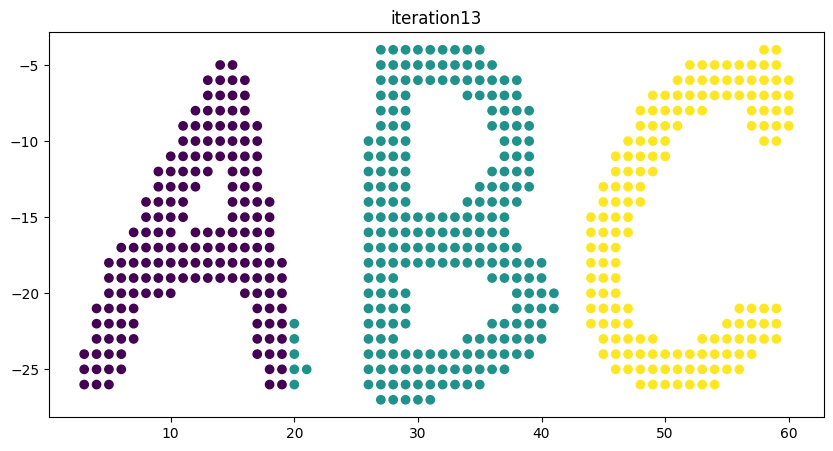

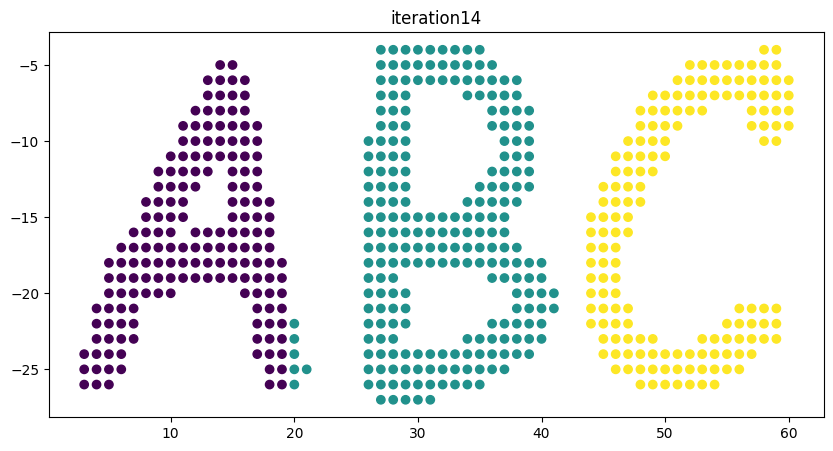

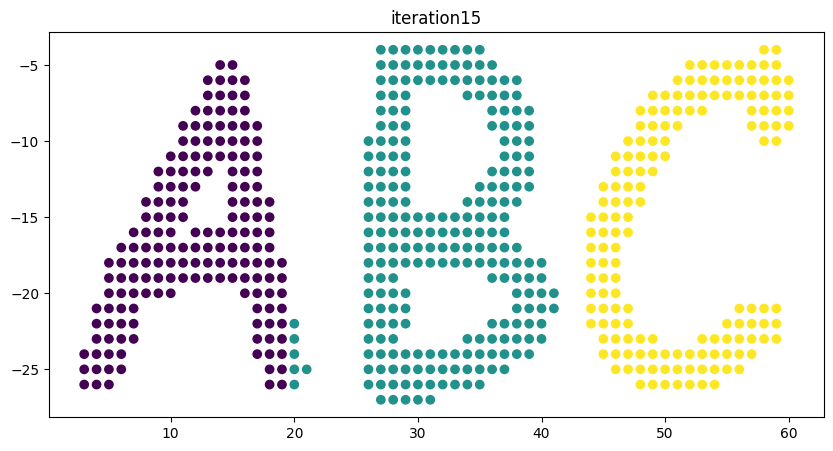

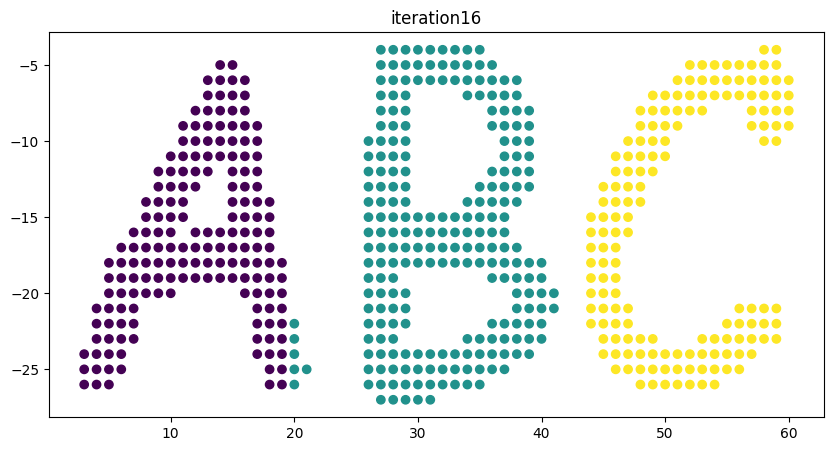

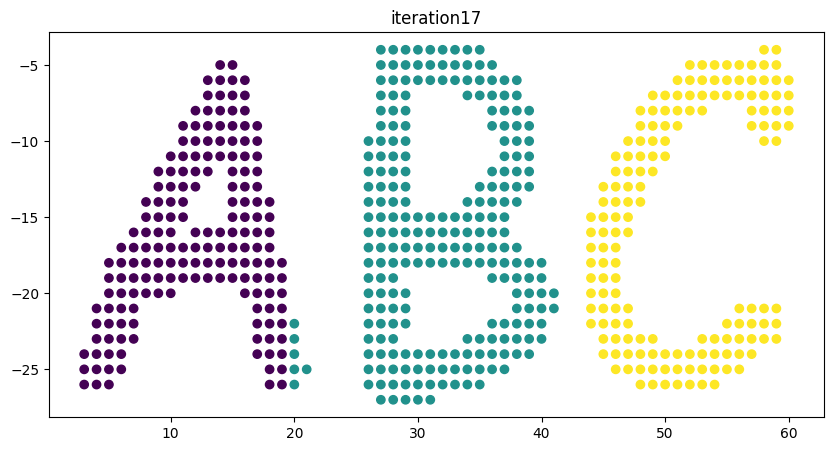

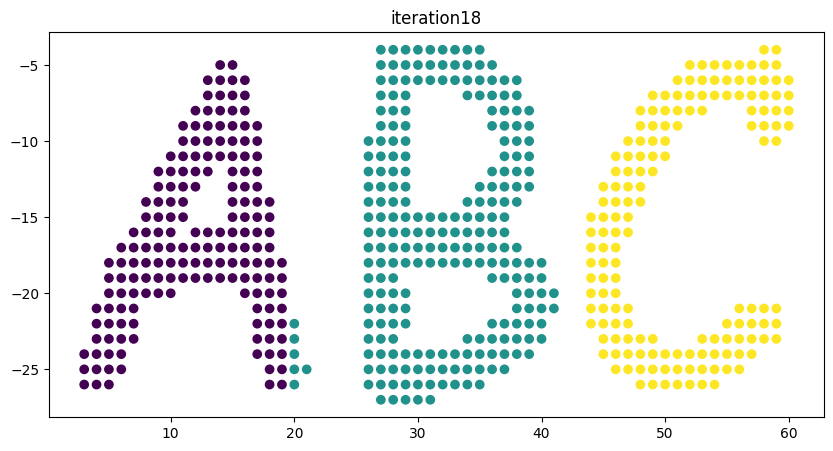

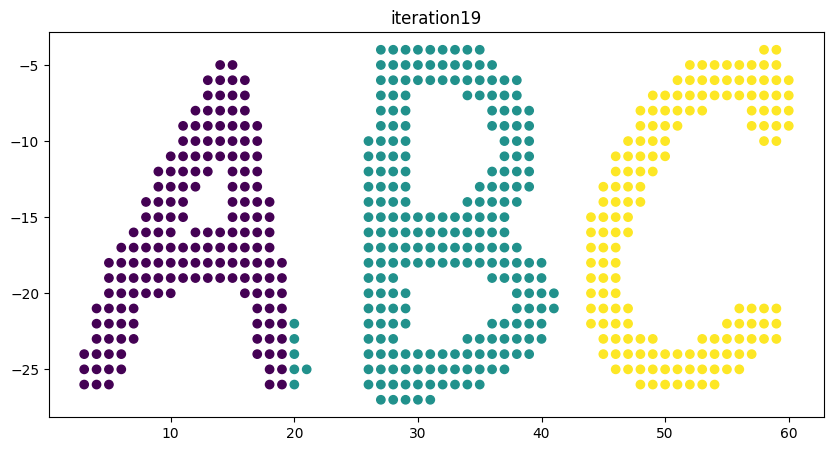

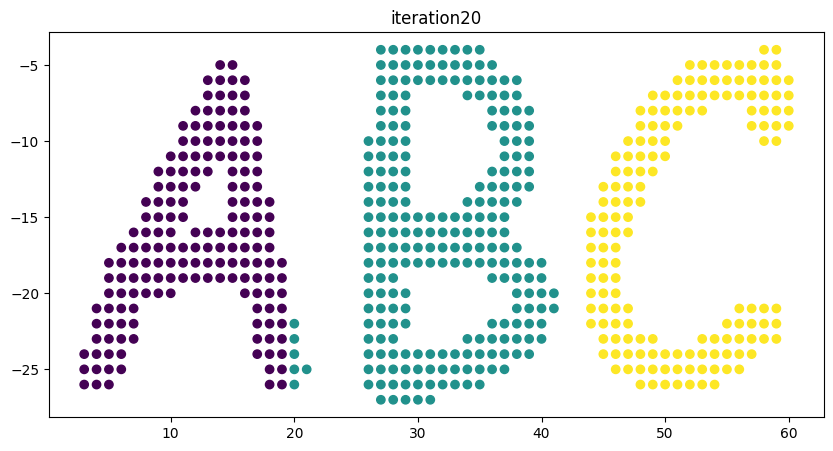

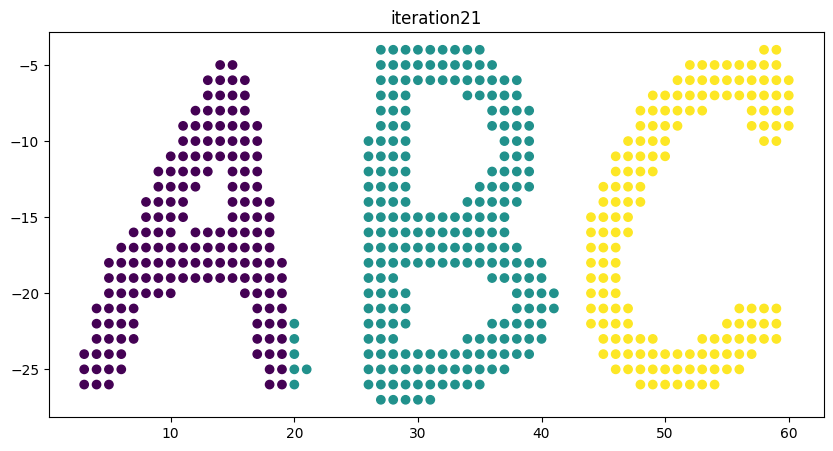

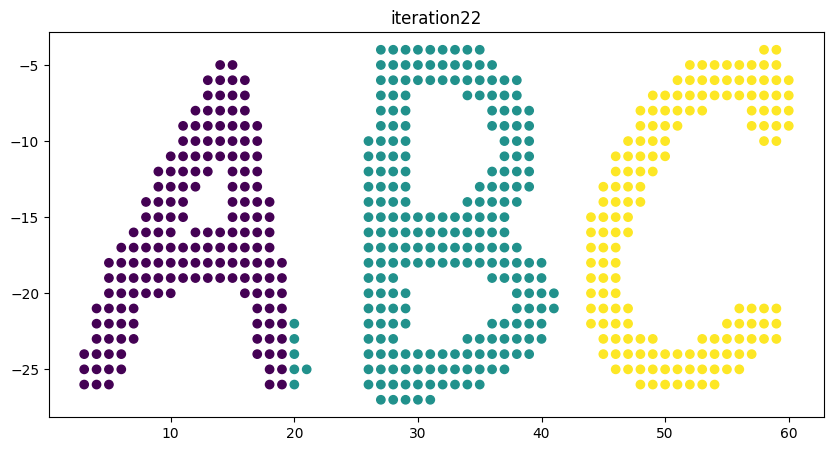

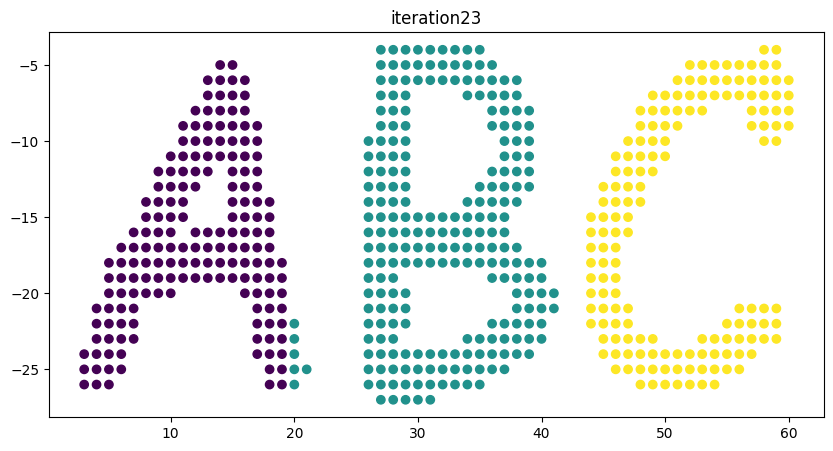

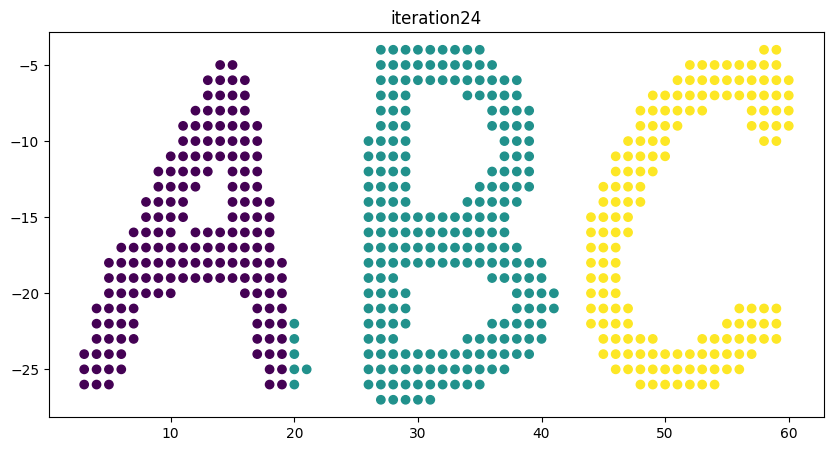

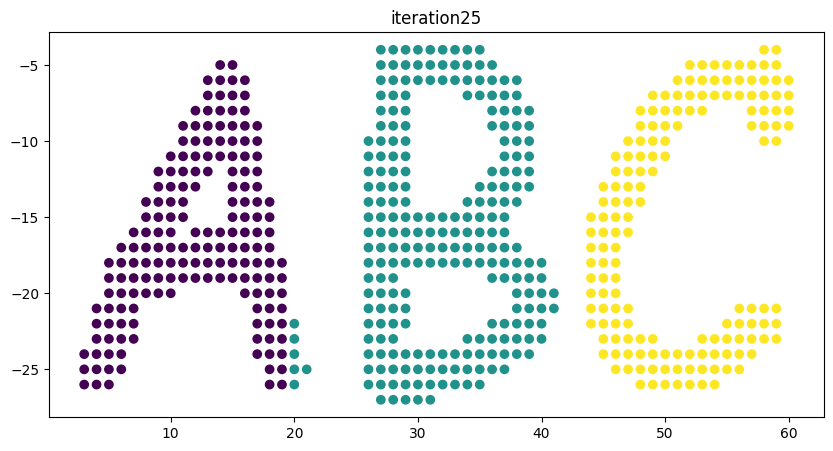

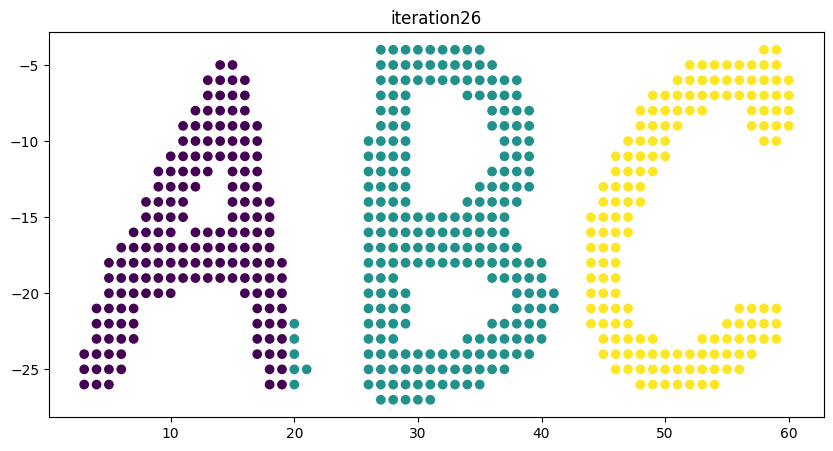

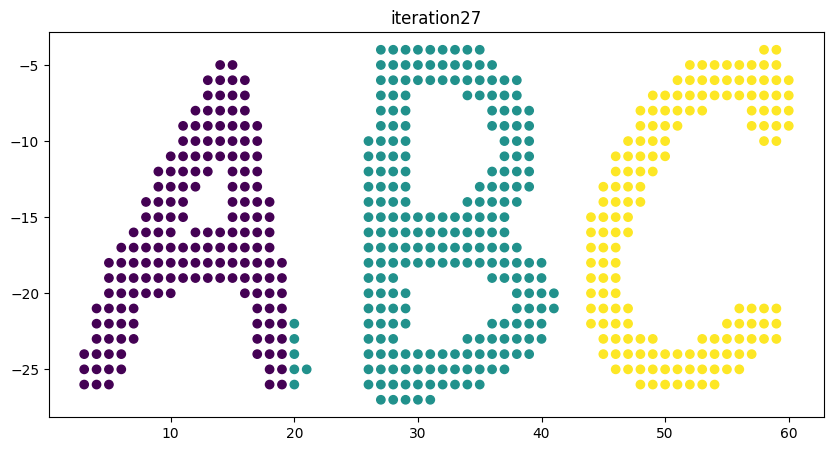

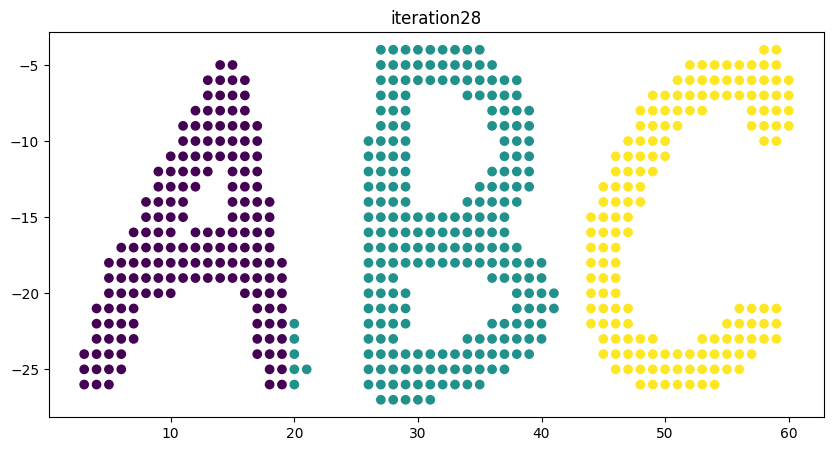

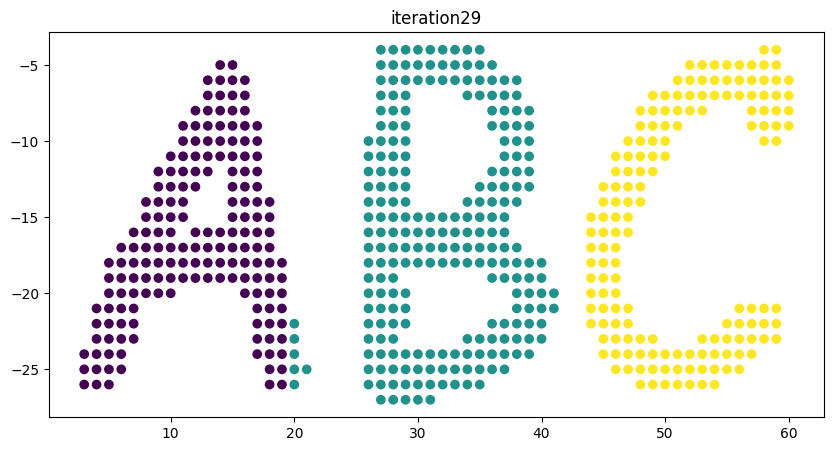

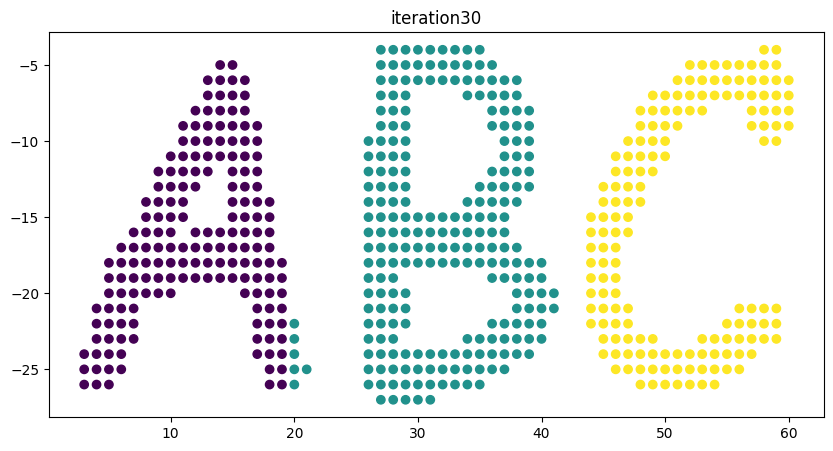

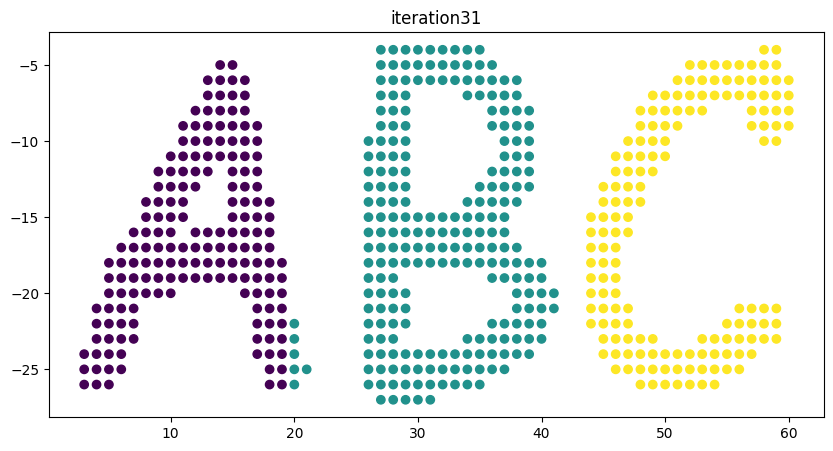

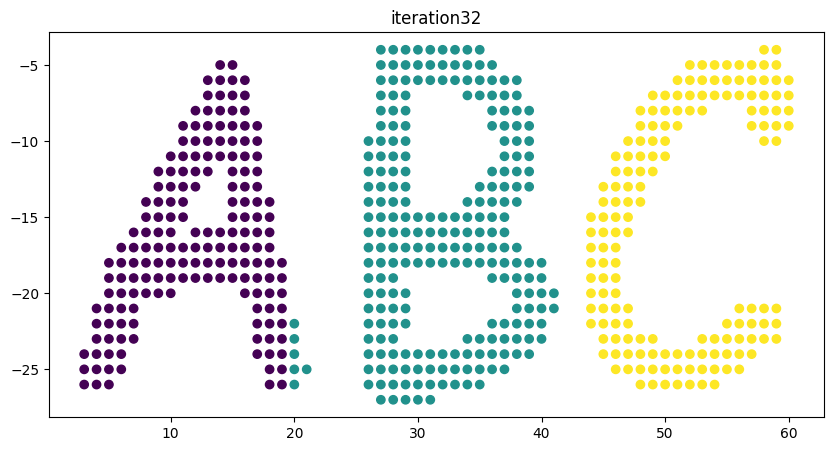

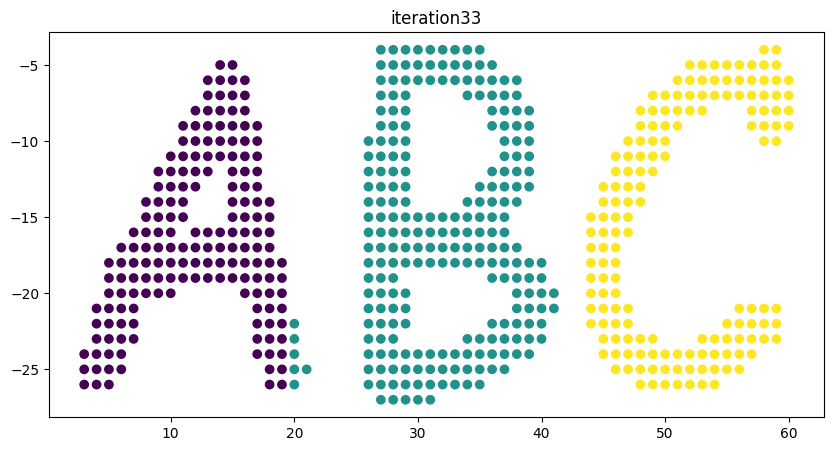

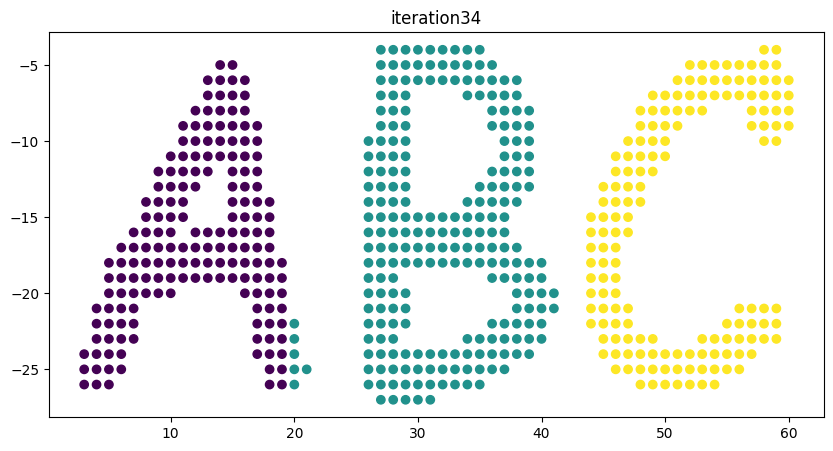

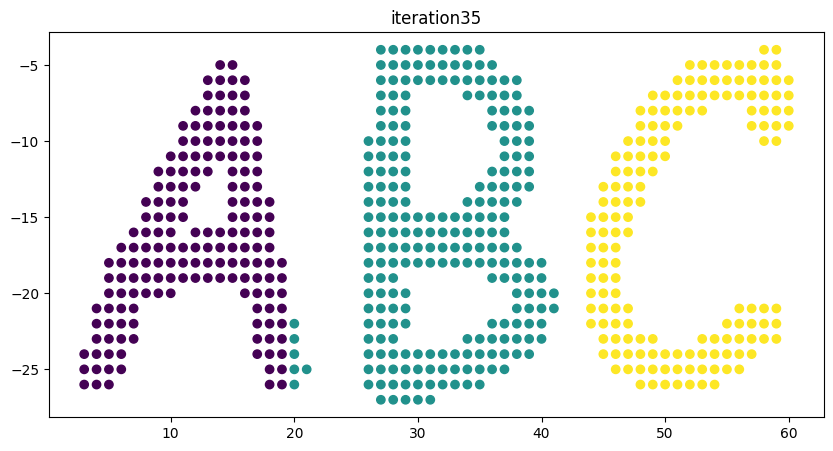

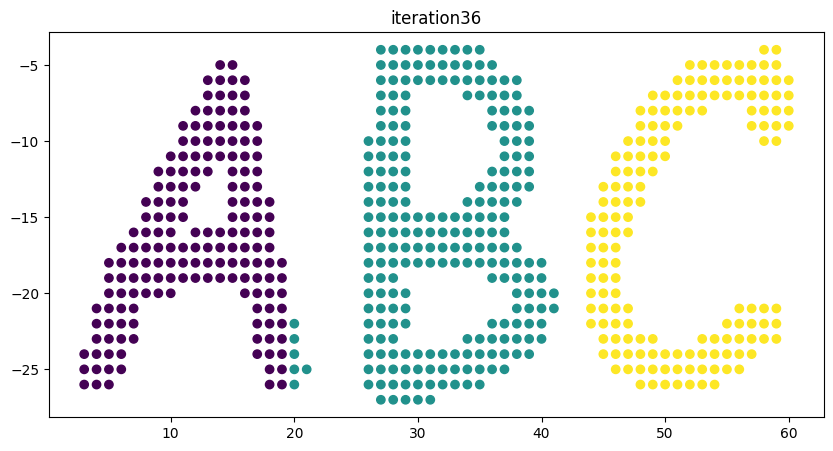

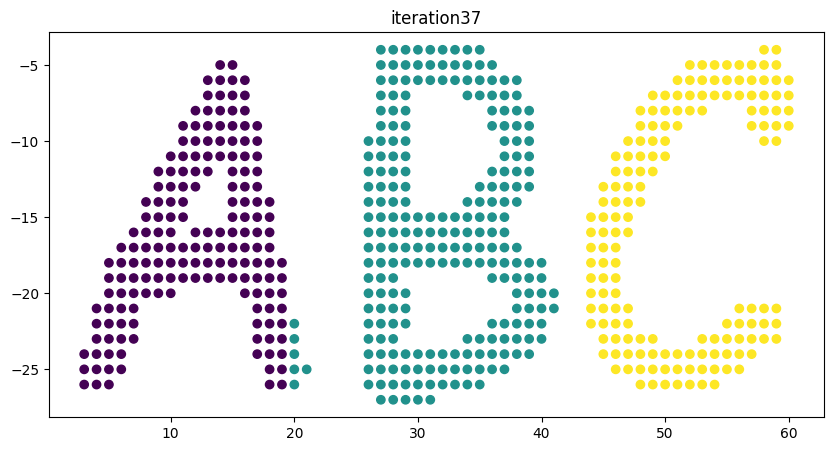

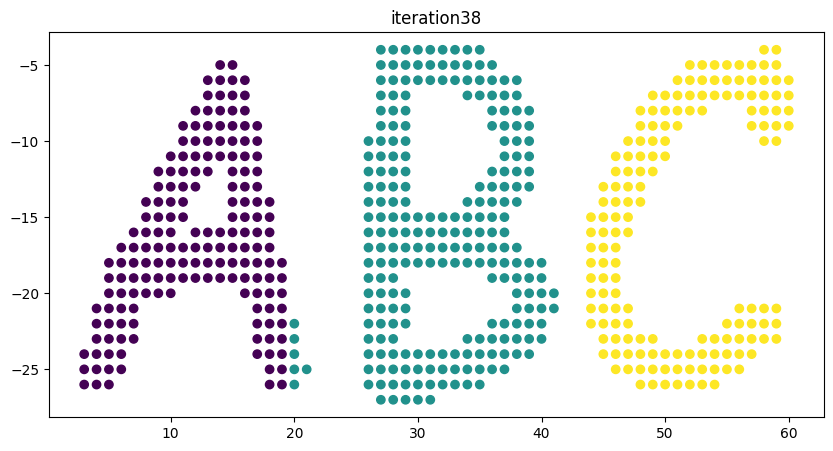

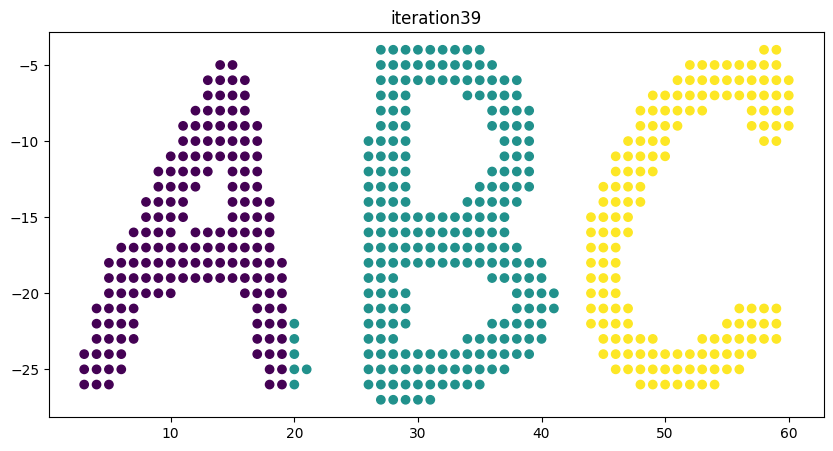

In [35]:
for k in range(len(mus)):
# for k in [-1]:
    mu = mus[k]
    
    thresh = 0
    x_labels = []
    tots = []
    for i in range(points_y.shape[0]):
        tot = [0]*len(file_path_extensions)
        for j in range(mu.shape[0]): 
            if mu[j, i] > thresh:
                tot[index[j]] += mu[j,i]
        tots.append(tot)
        x_labels.append(np.argmax(tot))
    tots = np.array(tots)
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot()
    ax.scatter(points_y[:,1], -points_y[:,0], c=x_labels)
    ax.set_title('iteration' + str(k))
#     plt.legend()
#     plt.savefig('abc-1-3-%d.png'%(k,))
    plt.show()